Dataset Link: https://www.kaggle.com/datasets/vbookshelf/rice-leaf-diseases

In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from keras.utils import to_categorical
import numpy as np
import cv2 as cv 
import os

In [2]:
data_path = r"C:\Deep Learning\CNN\rice_leaf_diseases"
print(os.listdir(data_path))

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [3]:
X = []
y = []
k = 0

In [4]:
for diseases in os.listdir(data_path):
    class_path = os.path.join(data_path, diseases)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        img  = cv.imread(image_path)
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        img = cv.resize(img,(28,28))
        X.append(img)
        y.append(k)
    k+=1

Pre-processing

In [5]:
np_X = np.array(X)
np_y = np.array(y)
np_X = np_X.reshape(-1,28,28,1)
np_y = np_y.reshape(-1,1)

In [6]:
np_Y = to_categorical(np_y, num_classes=3)

In [7]:
X_train , X_test , Y_train , Y_test = train_test_split(np_X,np_Y,test_size=0.2,random_state=42)
X_train.shape
Y_train.shape

(96, 3)

Model Creation

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(25, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(15, (3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 25)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 15)        3390      
                                                                 
 flatten_1 (Flatten)         (None, 1815)              0         
                                                                 
 dense_2 (Dense)             (None, 30)                54480     
                                                                 
 dense_3 (Dense)             (None, 3)                 93        
                                                      

Training

In [13]:
model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
3/3 [==============================] - 1s 115ms/step - loss: 55.5007 - accuracy: 0.2632 - val_loss: 6.5586 - val_accuracy: 0.1500
Epoch 2/15
3/3 [==============================] - 0s 33ms/step - loss: 7.1931 - accuracy: 0.2763 - val_loss: 5.8296 - val_accuracy: 0.3500
Epoch 3/15
3/3 [==============================] - 0s 24ms/step - loss: 4.1112 - accuracy: 0.3289 - val_loss: 4.6828 - val_accuracy: 0.3000
Epoch 4/15
3/3 [==============================] - 0s 24ms/step - loss: 4.2054 - accuracy: 0.4605 - val_loss: 3.4549 - val_accuracy: 0.1500
Epoch 5/15
3/3 [==============================] - 0s 24ms/step - loss: 2.4441 - accuracy: 0.4079 - val_loss: 3.8598 - val_accuracy: 0.2500
Epoch 6/15
3/3 [==============================] - 0s 24ms/step - loss: 2.4706 - accuracy: 0.3553 - val_loss: 2.4013 - val_accuracy: 0.2500
Epoch 7/15
3/3 [==============================] - 0s 27ms/step - loss: 1.5240 - accuracy: 0.3947 - val_loss: 2.0979 - val_accuracy: 0.2000
Epoch 8/15
3/3 [=========

Prediction

In [14]:
p=[]
img_path = r'C:\Deep Learning\CNN\testing\t1.JPG'
pred_img = cv.imread(img_path)
pred_img = cv.cvtColor(pred_img, cv.COLOR_BGR2RGB)
Pred_img = cv.resize(pred_img,(28,28))
p.append(img)
np_p = np.array(p)
prediction = model.predict(np_p)
print(prediction)


1/1 [==============================] - 0s 123ms/step
[[0.80457103 0.1896913  0.00573762]]


Labelling the output

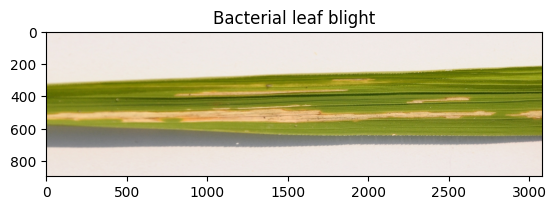

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def display_image_with_label(probabilities):
    labels = ["Bacterial leaf blight", "Brown spot", "Leaf smut"]
    
    # Find the index of the maximum probability
    max_index = np.argmax(probabilities)
    
    # Display the input image with the corresponding label
    plt.imshow(pred_img)
    plt.title(labels[max_index])
    plt.show()

display_image_with_label(prediction)
